# THIS IS NOT A TUTORIAL

This notebook is my (Abhinav Uppala) exploration & development of unsupervised learning techniques to be used with this dataset. Tutorials for how to use my implemented methods & everything else are in the other notebook files.

In [5]:
from TelescopeML.DataMaster import *
from TelescopeML.DeepTrainer import *
from TelescopeML.Predictor import *
from TelescopeML.IO_utils import load_or_dump_trained_model_CNN
from TelescopeML.StatVisAnalyzer import *

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

# Unsupervised Learning Exploration

This first part is just repeated from the previous tutorials, in order to load the training data to be used in unsupervised learning.

In [6]:
import os 

__reference_data_path__ = os.getenv("TelescopeML_reference_data")
__reference_data_path__ 


# Note: insert the directory of the reference_data if you get an error reading the reference data!!!
# __reference_data_path__ = 'INSERT_DIRECTORY_OF_reference_data'


'C:\\Users\\abhin\\TelescopeML_project\\reference_data'

In [7]:
train_BD = pd.read_csv(os.path.join(__reference_data_path__, 
                                    'training_datasets', 
                                    'browndwarf_R100_v4_newWL_v3.csv.bz2'), compression='bz2')
train_BD.head()

,gravity,temperature,c_o_ratio,metallicity,2.512,2.487,2.462,2.438,2.413,2.389,...,0.981,0.971,0.962,0.952,0.943,0.933,0.924,0.915,0.906,0.897
0,5.0,1100,0.25,-1.0,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,1.257751e-07,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08
1,5.0,1100,0.25,-0.7,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,1.257751e-07,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08
2,5.0,1100,0.25,-0.5,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,1.257751e-07,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08
3,5.0,1100,0.25,-0.3,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,1.257751e-07,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08
4,5.0,1100,0.25,0.0,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,1.257751e-07,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08


In [8]:
output_names = ['gravity', 'temperature', 'c_o_ratio', 'metallicity']
train_BD[output_names].head()

,gravity,temperature,c_o_ratio,metallicity
0,5.0,1100,0.25,-1.0
1,5.0,1100,0.25,-0.7
2,5.0,1100,0.25,-0.5
3,5.0,1100,0.25,-0.3
4,5.0,1100,0.25,0.0


In [9]:
wavelength_names = [item for item in train_BD.columns.to_list() if item not in output_names]
wavelength_names[:5]

['2.512', '2.487', '2.462', '2.438', '2.413']

In [10]:
wavelength_values = [float(item) for item in wavelength_names]
wavelength_values[:10]

[2.512, 2.487, 2.462, 2.438, 2.413, 2.389, 2.366, 2.342, 2.319, 2.296]

In [11]:
wl_synthetic = pd.read_csv(os.path.join(__reference_data_path__, 
                                        'training_datasets', 
                                        'wl.csv'))
wl_synthetic.head()

,wl
0,2.511960
1,2.486966
2,2.462220
3,2.437720
4,2.413464


## Prepare Inputs & Outputs

In [12]:
# Training  variables
X = train_BD.drop(
    columns=['gravity', 
             'temperature', 
             'c_o_ratio', 
             'metallicity'])


# Target/Output feature variables
y = train_BD[['gravity', 'c_o_ratio', 'metallicity', 'temperature', ]]

In [13]:
y.loc[:, 'temperature'] = np.log10(y['temperature'])

In [14]:
# check the output variables
y.head()

,gravity,c_o_ratio,metallicity,temperature
0,5.0,0.25,-1.0,3.041393
1,5.0,0.25,-0.7,3.041393
2,5.0,0.25,-0.5,3.041393
3,5.0,0.25,-0.3,3.041393
4,5.0,0.25,0.0,3.041393


In [15]:
# check our input variables table
X.head()

,2.512,2.487,2.462,2.438,2.413,2.389,2.366,2.342,2.319,2.296,...,0.981,0.971,0.962,0.952,0.943,0.933,0.924,0.915,0.906,0.897
0,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,8.548790e-08,6.015843e-08,9.539690e-08,7.383212e-08,...,1.257751e-07,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08
1,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,8.548790e-08,6.015843e-08,9.539690e-08,7.383212e-08,...,1.257751e-07,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08
2,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,8.548790e-08,6.015843e-08,9.539690e-08,7.383212e-08,...,1.257751e-07,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08
3,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,8.548790e-08,6.015843e-08,9.539690e-08,7.383212e-08,...,1.257751e-07,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08
4,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,8.548790e-08,6.015843e-08,9.539690e-08,7.383212e-08,...,1.257751e-07,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08


In [16]:
# 104 rows, 30_888 columns
X.shape

(30888, 104)

## PCA

I decided to try Principal Component Analysis first because it's reliable & quick for a first test run. Once I do a first attempt, I can try other methods that may be more time or resource intensive. I chose this approach due to the short deadline (1 week) and computational capabilities (laptop).

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [18]:
X_scaled = StandardScaler().fit_transform(X)
X_scaled[:5]

array([[-0.31312607, -0.31507733, -0.31761373, -0.32395085, -0.3369144 ,
        -0.35760755, -0.36587906, -0.37099414, -0.36639896, -0.38134039,
        -0.38611028, -0.38779643, -0.37112821, -0.37903271, -0.33094519,
        -0.30793144, -0.28823629, -0.27208209, -0.25980226, -0.26989023,
        -0.27006092, -0.28042034, -0.30365634, -0.31023658, -0.32940748,
        -0.34148938, -0.3361941 , -0.3310189 , -0.31526892, -0.32219609,
        -0.31931609, -0.32911101, -0.33015185, -0.32401318, -0.32274677,
        -0.33217374, -0.32416863, -0.32024413, -0.31086675, -0.33257572,
        -0.32810172, -0.32892751, -0.29389404, -0.30032338, -0.27334418,
        -0.21492982, -0.20578419, -0.23740824, -0.26138444, -0.28465813,
        -0.30499141, -0.31681964, -0.32394721, -0.32138745, -0.31698844,
        -0.32175107, -0.31790998, -0.30612685, -0.32603988, -0.33097194,
        -0.33400312, -0.32920479, -0.34421791, -0.35127925, -0.29316499,
        -0.22697875, -0.20027294, -0.16371611, -0.1

In [19]:
# Dimensionality reduction on X values
pca = PCA()
pca.fit(X_scaled)
pca_data = pca.transform(X_scaled)

In [20]:
# Calculate variances that each PC accounts for
variances = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = [f'PC{i + 1}' for i in range(len(variances))]

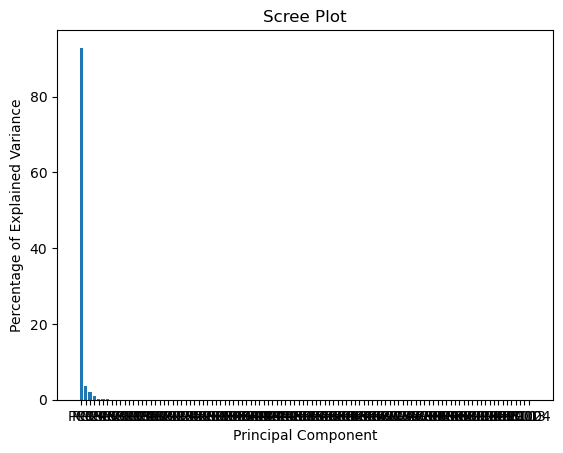

In [21]:
# Plot the percent variances of each PC
plt.bar(x=range(1,len(variances)+1), height=variances, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

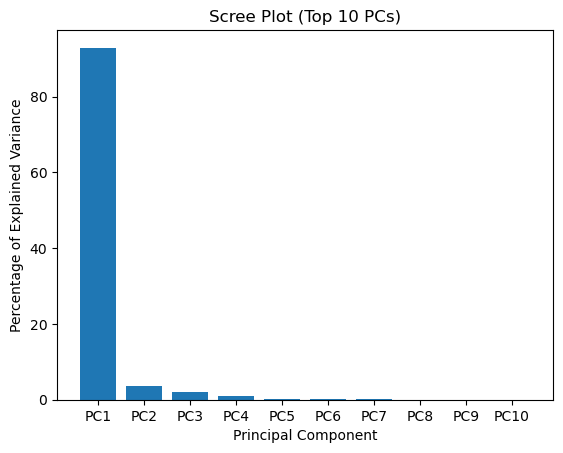

In [22]:
# Since there are a lot of principal components let's look at the top 10
# as the rest don't seem to have any effect at all
plt.bar(x=range(1,11), height=variances[:10], tick_label=labels[:10])
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot (Top 10 PCs)')
plt.show()

In [23]:
variances[0] + variances[1]

96.60000000000001

In [24]:
labels[:5]

['PC1', 'PC2', 'PC3', 'PC4', 'PC5']

Since the first 2 Principal Components account for 96.6% of the variation it should be fine to use these 2 in a 2D plot to eyeball clusters

In [25]:
pca_data.shape

(30888, 104)

Text(0, 0.5, 'PC2 - 3.7%')

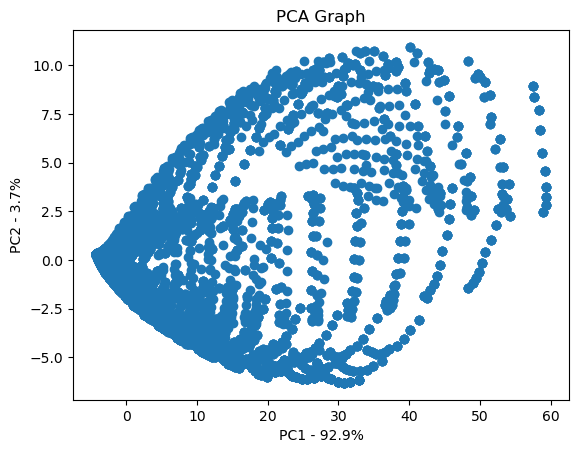

In [26]:
# Unannotated graph to start with
# From here, draw seperate graphs
pca_df = pd.DataFrame(pca_data, index=list(range(30888)), columns=labels)

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('PCA Graph')
plt.xlabel(f'PC1 - {variances[0]}%')
plt.ylabel(f'PC2 - {variances[1]}%')

In [27]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104
0,-3.057954,0.039267,-0.349515,-0.224111,0.05906,-0.208964,-0.173231,-0.092268,-0.193533,0.032331,...,-0.000929,0.000293,-0.000241,-0.000081,0.000119,0.000465,0.000258,0.000294,-0.000029,0.000141
1,-3.057954,0.039267,-0.349515,-0.224111,0.05906,-0.208964,-0.173231,-0.092268,-0.193533,0.032331,...,-0.000929,0.000293,-0.000241,-0.000081,0.000119,0.000465,0.000258,0.000294,-0.000029,0.000141
2,-3.057954,0.039267,-0.349515,-0.224111,0.05906,-0.208964,-0.173231,-0.092268,-0.193533,0.032331,...,-0.000929,0.000293,-0.000241,-0.000081,0.000119,0.000465,0.000258,0.000294,-0.000029,0.000141
3,-3.057954,0.039267,-0.349515,-0.224111,0.05906,-0.208964,-0.173231,-0.092268,-0.193533,0.032331,...,-0.000929,0.000293,-0.000241,-0.000081,0.000119,0.000465,0.000258,0.000294,-0.000029,0.000141
4,-3.057954,0.039267,-0.349515,-0.224111,0.05906,-0.208964,-0.173231,-0.092268,-0.193533,0.032331,...,-0.000929,0.000293,-0.000241,-0.000081,0.000119,0.000465,0.000258,0.000294,-0.000029,0.000141


In [28]:
pca_df.shape

(30888, 104)

In [29]:
# Create a function that plots the PCA Graph but color codes with reference to a certain parameter
# for instance, with temperature, the lowest temperature is the darkest dot.

def plot_PCA_against_single_feature(feature: str):

    arr = y[feature].values
    normalized_values = (arr - np.min(arr)) / (np.max(arr) - np.min(arr))

    plt.scatter(pca_df.PC1, pca_df.PC2, s = 4, c=[(normalized_values[i], normalized_values[i], 0) for i in range(len(pca_df))])
    plt.title(f'PCA Graph - {feature}')
    plt.xlabel(f'PC1 - {variances[0]}%')
    plt.ylabel(f'PC2 - {variances[1]}%')

In [30]:
y.columns

Index(['gravity', 'c_o_ratio', 'metallicity', 'temperature'], dtype='object')

## Observations

Temperature - very concentrated at one point, while it's spread out. Clusters are not as intermingled as other ones but still a little vague, especially since so many of them are concentrated at one area. The best clustering method to use here might be DBSCAN or GMM.

C/O Ratio - arguably the cleanest clusters, being grouped horizontally into almost 4-5 groups. This one could utilize K-means better than others but DBSCAN still seems better still, since there are a lot of points concentrated at the bottom. Tiny bit of overlap, so GMM isn't really necessary here.

Metallicity - clusters are very much intermingling, almost like a rib cage of some sort, where clusters form a straight-ish line approaching from the top/bottom. Here I believe that GMM would be the best course of action, due to it's ability to deal with overlapping clusters. DBSCAN would be the next best bet I believe.

Gravity - similar to metallicity, but the bottom is not like one big cluster; instead, it also alternates between high and low gravity. Again, GMM seems like the best method.

Overall the clusters are quite misleading, so it is probably worth trying a different dimensionality reduction method. PCA does not seem to do well since it wants nonlinear data.

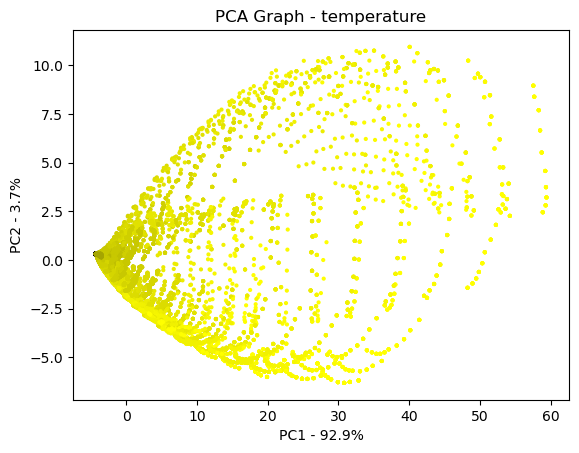

In [31]:
plot_PCA_against_single_feature('temperature')

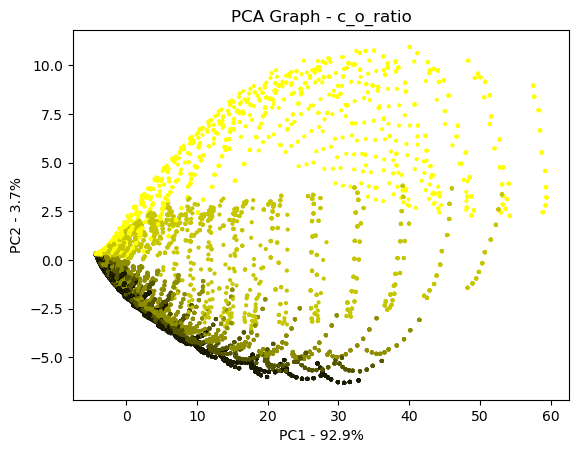

In [32]:
plot_PCA_against_single_feature('c_o_ratio')

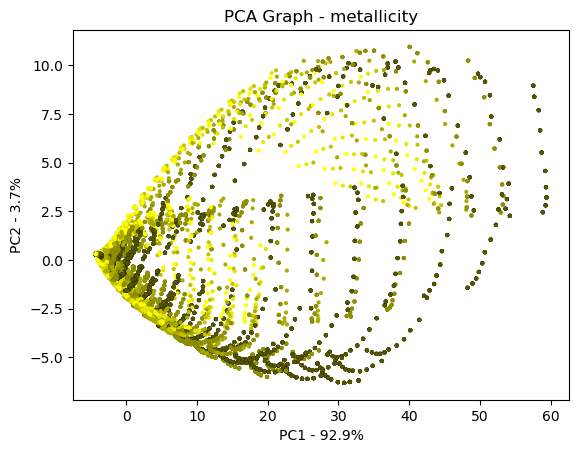

In [33]:
plot_PCA_against_single_feature('metallicity')

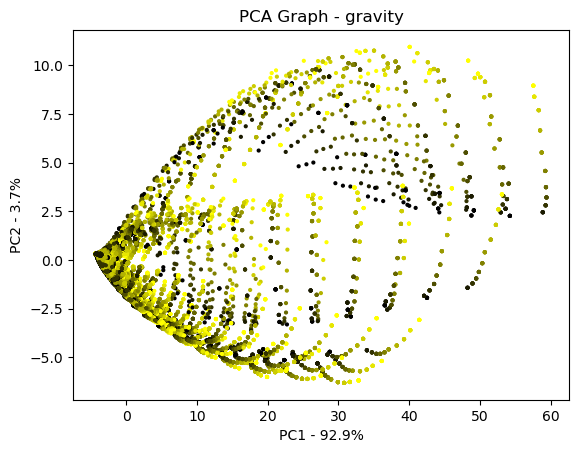

In [34]:
plot_PCA_against_single_feature('gravity')

## Autoencoder

Since PCA did not work out well, I want to try an autoencoder approach to see if it creates better clusters. I avoided this at first because of the training time, but it would be unfair to test a clustering method on this jumbled up plot and blame the failure on the clustering method.

In [35]:
from sklearn.model_selection import train_test_split

# 80/20 train/test split
train, test = train_test_split(train_BD, test_size=0.2)

display(train.head())
display(test.head())

,gravity,temperature,c_o_ratio,metallicity,2.512,2.487,2.462,2.438,2.413,2.389,...,0.981,0.971,0.962,0.952,0.943,0.933,0.924,0.915,0.906,0.897
23410,3.50,2100,0.25,1.7,6.960825e-07,8.441733e-07,1.016480e-06,1.052485e-06,1.201031e-06,1.424476e-06,...,3.316751e-07,3.331415e-07,3.043150e-07,3.243060e-07,2.744239e-07,2.270990e-07,4.050839e-07,5.463692e-07,5.114262e-07,4.059780e-07
22151,4.50,1800,1.50,2.0,3.552811e-07,4.395661e-07,5.300196e-07,5.760761e-07,5.439170e-07,5.869190e-07,...,2.410099e-07,1.987916e-07,1.633624e-07,1.669569e-07,1.421048e-07,1.034428e-07,1.268837e-07,1.250650e-07,1.068786e-07,7.348502e-08
13303,5.25,1700,2.00,0.7,6.147024e-07,6.156911e-07,5.545822e-07,4.829514e-07,4.468211e-07,3.575566e-07,...,8.845705e-07,8.625873e-07,7.785963e-07,6.642892e-07,5.523682e-07,4.494389e-07,4.367155e-07,4.357094e-07,3.439643e-07,2.463367e-07
17035,5.25,275,1.50,0.7,1.477680e-13,1.526516e-13,8.153482e-14,9.687630e-15,1.788158e-15,1.165481e-16,...,1.936306e-13,1.170441e-13,5.043207e-15,6.770305e-16,2.583841e-15,3.564929e-17,4.488980e-13,1.527083e-13,3.941314e-14,1.893365e-15
29400,4.25,950,1.00,-1.0,3.865400e-08,4.291881e-08,3.569766e-08,2.697272e-08,2.288154e-08,1.433312e-08,...,5.904458e-08,4.515416e-08,3.435637e-08,3.306107e-08,2.967499e-08,1.926441e-08,2.675747e-08,2.576855e-08,2.113025e-08,1.336843e-08


,gravity,temperature,c_o_ratio,metallicity,2.512,2.487,2.462,2.438,2.413,2.389,...,0.981,0.971,0.962,0.952,0.943,0.933,0.924,0.915,0.906,0.897
20290,5.25,400,2.00,1.7,2.258949e-13,1.910139e-13,1.167601e-13,1.481240e-14,2.792723e-15,1.585465e-16,...,4.953896e-15,1.395618e-14,1.284398e-15,2.792601e-16,6.112138e-16,1.350684e-17,5.276110e-14,7.150146e-15,2.802500e-16,1.444406e-17
13045,4.25,350,0.50,-0.7,2.854241e-11,3.377244e-11,2.977030e-11,1.120344e-11,5.367351e-12,2.105156e-12,...,5.431980e-11,3.911892e-11,8.416970e-12,4.507788e-12,6.958806e-12,7.520618e-13,4.048988e-11,3.736248e-11,3.087626e-11,9.456151e-12
24217,5.00,300,1.00,-0.7,2.133617e-12,2.386002e-12,1.577230e-12,4.151594e-13,1.324991e-13,3.662675e-14,...,2.597803e-11,1.382472e-11,1.517884e-12,4.472751e-13,1.382792e-12,5.828435e-14,3.300628e-11,2.657812e-11,2.008885e-11,3.041770e-12
29671,3.50,250,0.25,0.7,8.355343e-14,6.222715e-14,4.066446e-14,8.785724e-15,2.318966e-15,2.463482e-16,...,3.883028e-16,1.846444e-15,1.410594e-16,2.185616e-17,2.849767e-17,7.641152e-19,3.847134e-15,1.253651e-15,2.624500e-16,1.295081e-17
27234,4.25,450,0.50,0.5,9.387658e-11,1.137820e-10,1.192570e-10,4.893054e-11,2.477359e-11,8.821073e-12,...,8.688089e-11,6.384417e-11,1.814665e-11,1.287293e-11,1.589320e-11,2.599212e-12,7.660836e-11,6.708509e-11,4.911528e-11,1.548230e-11


In [36]:
# Input datasets
X_train = train.drop(
    columns=['gravity', 
             'temperature', 
             'c_o_ratio', 
             'metallicity'])

X_test = test.drop(
    columns=['gravity', 
             'temperature', 
             'c_o_ratio', 
             'metallicity'])


# Output datasets

y_train = train[['gravity', 'c_o_ratio', 'metallicity', 'temperature', ]]
y_test  =  test[['gravity', 'c_o_ratio', 'metallicity', 'temperature', ]]

display(X_train.head())
display(X_test.head())
display(y_train.head())
display(y_test.head())

,2.512,2.487,2.462,2.438,2.413,2.389,2.366,2.342,2.319,2.296,...,0.981,0.971,0.962,0.952,0.943,0.933,0.924,0.915,0.906,0.897
23410,6.960825e-07,8.441733e-07,1.016480e-06,1.052485e-06,1.201031e-06,1.424476e-06,1.641542e-06,1.532536e-06,1.975700e-06,2.039792e-06,...,3.316751e-07,3.331415e-07,3.043150e-07,3.243060e-07,2.744239e-07,2.270990e-07,4.050839e-07,5.463692e-07,5.114262e-07,4.059780e-07
22151,3.552811e-07,4.395661e-07,5.300196e-07,5.760761e-07,5.439170e-07,5.869190e-07,6.362015e-07,6.001091e-07,6.111041e-07,9.474037e-07,...,2.410099e-07,1.987916e-07,1.633624e-07,1.669569e-07,1.421048e-07,1.034428e-07,1.268837e-07,1.250650e-07,1.068786e-07,7.348502e-08
13303,6.147024e-07,6.156911e-07,5.545822e-07,4.829514e-07,4.468211e-07,3.575566e-07,3.634276e-07,2.833899e-07,3.580569e-07,3.304862e-07,...,8.845705e-07,8.625873e-07,7.785963e-07,6.642892e-07,5.523682e-07,4.494389e-07,4.367155e-07,4.357094e-07,3.439643e-07,2.463367e-07
17035,1.477680e-13,1.526516e-13,8.153482e-14,9.687630e-15,1.788158e-15,1.165481e-16,3.546950e-17,5.086436e-18,1.105852e-16,1.757378e-18,...,1.936306e-13,1.170441e-13,5.043207e-15,6.770305e-16,2.583841e-15,3.564929e-17,4.488980e-13,1.527083e-13,3.941314e-14,1.893365e-15
29400,3.865400e-08,4.291881e-08,3.569766e-08,2.697272e-08,2.288154e-08,1.433312e-08,1.215227e-08,7.235109e-09,1.328097e-08,8.097133e-09,...,5.904458e-08,4.515416e-08,3.435637e-08,3.306107e-08,2.967499e-08,1.926441e-08,2.675747e-08,2.576855e-08,2.113025e-08,1.336843e-08


,2.512,2.487,2.462,2.438,2.413,2.389,2.366,2.342,2.319,2.296,...,0.981,0.971,0.962,0.952,0.943,0.933,0.924,0.915,0.906,0.897
20290,2.258949e-13,1.910139e-13,1.167601e-13,1.481240e-14,2.792723e-15,1.585465e-16,4.587483e-17,1.139428e-17,1.327170e-16,5.408906e-18,...,4.953896e-15,1.395618e-14,1.284398e-15,2.792601e-16,6.112138e-16,1.350684e-17,5.276110e-14,7.150146e-15,2.802500e-16,1.444406e-17
13045,2.854241e-11,3.377244e-11,2.977030e-11,1.120344e-11,5.367351e-12,2.105156e-12,1.225894e-12,3.678087e-13,1.153654e-12,4.370059e-13,...,5.431980e-11,3.911892e-11,8.416970e-12,4.507788e-12,6.958806e-12,7.520618e-13,4.048988e-11,3.736248e-11,3.087626e-11,9.456151e-12
24217,2.133617e-12,2.386002e-12,1.577230e-12,4.151594e-13,1.324991e-13,3.662675e-14,1.532719e-14,4.022845e-15,2.374973e-14,3.214293e-15,...,2.597803e-11,1.382472e-11,1.517884e-12,4.472751e-13,1.382792e-12,5.828435e-14,3.300628e-11,2.657812e-11,2.008885e-11,3.041770e-12
29671,8.355343e-14,6.222715e-14,4.066446e-14,8.785724e-15,2.318966e-15,2.463482e-16,1.024272e-16,1.393060e-17,1.296990e-16,6.697632e-18,...,3.883028e-16,1.846444e-15,1.410594e-16,2.185616e-17,2.849767e-17,7.641152e-19,3.847134e-15,1.253651e-15,2.624500e-16,1.295081e-17
27234,9.387658e-11,1.137820e-10,1.192570e-10,4.893054e-11,2.477359e-11,8.821073e-12,5.551191e-12,1.488659e-12,4.916069e-12,1.844834e-12,...,8.688089e-11,6.384417e-11,1.814665e-11,1.287293e-11,1.589320e-11,2.599212e-12,7.660836e-11,6.708509e-11,4.911528e-11,1.548230e-11


,gravity,c_o_ratio,metallicity,temperature
23410,3.50,0.25,1.7,2100
22151,4.50,1.50,2.0,1800
13303,5.25,2.00,0.7,1700
17035,5.25,1.50,0.7,275
29400,4.25,1.00,-1.0,950


,gravity,c_o_ratio,metallicity,temperature
20290,5.25,2.00,1.7,400
13045,4.25,0.50,-0.7,350
24217,5.00,1.00,-0.7,300
29671,3.50,0.25,0.7,250
27234,4.25,0.50,0.5,450


In [37]:
# standardize X and Y values

X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled =  StandardScaler().fit_transform(X_test)

y_train_scaled = StandardScaler().fit_transform(y_train)
y_test_scaled =  StandardScaler().fit_transform(y_test)

X_train_scaled[:5]

array([[ 0.13698987,  0.19096706,  0.27317591,  0.28151875,  0.35840559,
         0.45177442,  0.48950443,  0.46531872,  0.59264256,  0.55236711,
         0.48002967,  0.46532612,  0.34413381,  0.39377453,  0.22423691,
         0.1630385 ,  0.1219433 ,  0.06060013, -0.02005214, -0.04237552,
        -0.10865563, -0.13319766, -0.10016575, -0.13356433, -0.12204303,
        -0.11642814, -0.14352895, -0.12049942, -0.14764231, -0.15611659,
        -0.13291732, -0.12634052, -0.12669023, -0.10681948, -0.1164745 ,
        -0.04003135, -0.0183735 , -0.00209019, -0.02532118,  0.08943582,
         0.1143487 ,  0.04997419,  0.00317144, -0.01241762, -0.04685847,
        -0.15134102, -0.18631215, -0.22566739, -0.24734223, -0.27337983,
        -0.27026556, -0.27133146, -0.26729271, -0.26724602, -0.26563136,
        -0.26444256, -0.26690951, -0.24704465, -0.2440638 , -0.25113866,
        -0.27312091, -0.26115323, -0.22008641, -0.22597533, -0.16158207,
        -0.10893343, -0.0451554 , -0.03836429, -0.0

In [38]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Dense, BatchNormalization
import random


# Values will be encoded in a 2D space for clustering
output_dim = 2

# starting with 104 dimensions from spectra
input_dim = 104

# Encoder model 104 -> 52 -> 26 -> 10 -> 2 layers
encoder = Sequential([
    Dense(52, activation='relu', input_shape=(input_dim,)),
    Dense(26, activation='relu'),
    Dense(10, activation='relu'),
    Dense(output_dim, activation='linear')
])

# Decoder model 2 -> 20 -> 52 -> 104 layers
decoder = Sequential([
    Dense(20, activation='relu', input_shape=(output_dim,)),
    Dense(52, activation='relu'),
    Dense(input_dim, activation='linear')
])

In [39]:
from keras.optimizers import Adam

autoencoder = Model(inputs=encoder.input, outputs=decoder(encoder.output))
autoencoder.compile(loss='mse', optimizer=Adam())

Create a function that lets us see the original vs. reconstructed version of our spectra, to compare before vs. after

In [40]:
def plot_orig_vs_recon(title=''):
    fig = plt.figure(figsize=(10,6))
    plt.suptitle(title)

    sample = random.choice(X_test_scaled)

    # Plot the reconstructed X values
    plt.plot(autoencoder.predict(sample.reshape(1, -1)).flatten(), label='reconstructed')

    # plot the original X values
    plt.plot(sample, label='original')

    plt.legend()
    plt.grid(True)

Before training, as expected the autoencoder's output isn't even close.

1/1 [==============================] - 0s 115ms/step


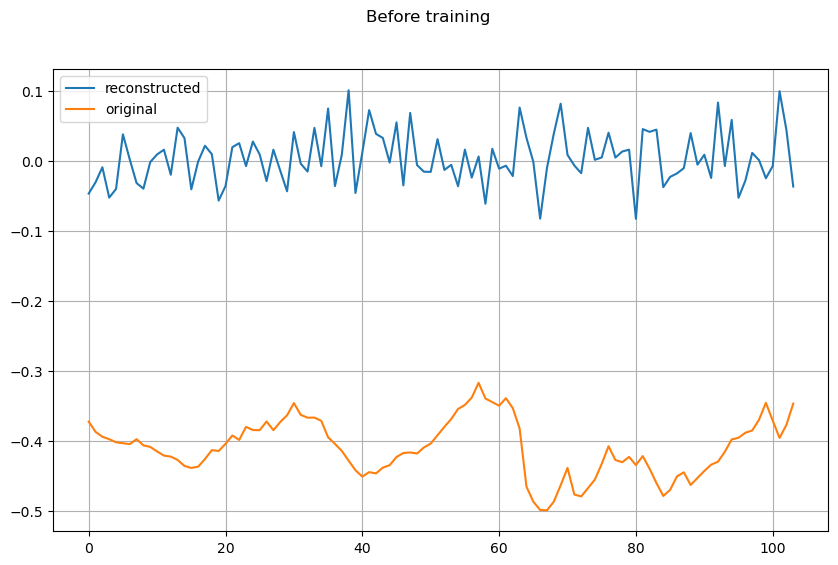

In [41]:
plot_orig_vs_recon('Before training')

Epoch 1/100
495/495 [==============================] - 2s 2ms/step - loss: 0.0825
Epoch 2/100
495/495 [==============================] - 1s 2ms/step - loss: 0.0213
Epoch 3/100
495/495 [==============================] - 1s 2ms/step - loss: 0.0163
Epoch 4/100
495/495 [==============================] - 1s 2ms/step - loss: 0.0137
Epoch 5/100
495/495 [==============================] - 1s 2ms/step - loss: 0.0122
Epoch 6/100
495/495 [==============================] - 1s 2ms/step - loss: 0.0127
Epoch 7/100
495/495 [==============================] - 1s 2ms/step - loss: 0.0101
Epoch 8/100
495/495 [==============================] - 1s 2ms/step - loss: 0.0096
Epoch 9/100
495/495 [==============================] - 1s 2ms/step - loss: 0.0093
Epoch 10/100
495/495 [==============================] - 1s 2ms/step - loss: 0.0096
Epoch 11/100
495/495 [==============================] - 1s 2ms/step - loss: 0.0091
Epoch 12/100
495/495 [==============================] - 1s 2ms/step - loss: 0.0089
Epoch 13/100


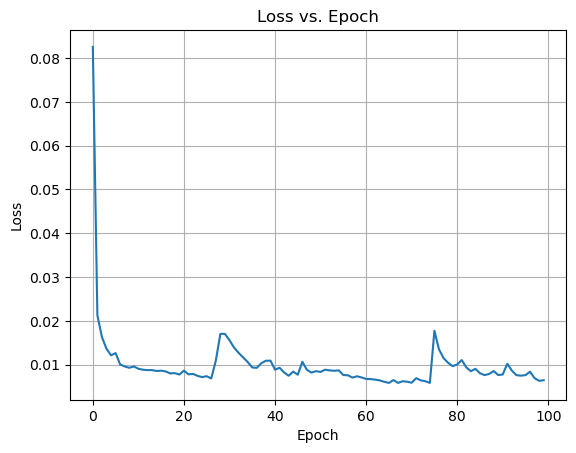

In [42]:
autoencoder_epochs = 100
model_history = autoencoder.fit(X_train_scaled, X_train_scaled, epochs=autoencoder_epochs, batch_size=50, verbose=1,)

plt.plot(model_history.history["loss"])
plt.title("Loss vs. Epoch")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.grid(True)

In [43]:
# At epoch 100, our loss is around 0.003 which seems pretty solid
model_history.history['loss'][-1]

0.006471830885857344

In [44]:
actual = X_test_scaled[0]
display(actual)
actual.shape

array([-0.37871629, -0.39439379, -0.40093081, -0.40256942, -0.40587113,
       -0.4055286 , -0.40616753, -0.39850713, -0.40803126, -0.40944616,
       -0.41596645, -0.42207166, -0.42431282, -0.42896172, -0.44382521,
       -0.45128161, -0.46111859, -0.45976248, -0.45664175, -0.4513813 ,
       -0.43184679, -0.40799744, -0.40906508, -0.38668096, -0.38831535,
       -0.38680112, -0.3735883 , -0.38681821, -0.37606981, -0.36543688,
       -0.34709906, -0.36407059, -0.36818437, -0.36832506, -0.37314952,
       -0.39699252, -0.40749381, -0.41672225, -0.43138967, -0.44369852,
       -0.45384759, -0.44721784, -0.45079071, -0.4416701 , -0.44131497,
       -0.44815825, -0.45536629, -0.44530514, -0.43634424, -0.42116135,
       -0.41000106, -0.39548607, -0.38210183, -0.37015448, -0.35565646,
       -0.34927098, -0.33843893, -0.31707034, -0.33952894, -0.34458692,
       -0.34977451, -0.33899423, -0.35317378, -0.38312026, -0.47374847,
       -0.50350401, -0.52290844, -0.53680472, -0.54728856, -0.53

(104,)

In [45]:
# reshape to size (1, 104) to represent a batch of 1
predicted = autoencoder.predict(X_test_scaled[0].reshape(1, -1), batch_size=1).flatten()
display(predicted)
predicted.shape

1/1 [==============================] - 0s 22ms/step


array([-0.37684122, -0.3944384 , -0.40537298, -0.4090847 , -0.41331083,
       -0.4159645 , -0.41733453, -0.40961123, -0.4204114 , -0.4227337 ,
       -0.42709768, -0.43258056, -0.4332849 , -0.4383544 , -0.44451454,
       -0.44646093, -0.45240048, -0.448898  , -0.4437883 , -0.44039342,
       -0.4230913 , -0.40321398, -0.40683904, -0.3859604 , -0.3886225 ,
       -0.3893448 , -0.37621993, -0.38798332, -0.37654963, -0.3659919 ,
       -0.347947  , -0.3648692 , -0.368167  , -0.36878595, -0.37319618,
       -0.3993516 , -0.41014236, -0.41928756, -0.43203825, -0.44661203,
       -0.4555525 , -0.4493455 , -0.4514231 , -0.44223106, -0.44091782,
       -0.44324854, -0.44902638, -0.440884  , -0.43584627, -0.42448264,
       -0.4156168 , -0.40307   , -0.39185956, -0.3797197 , -0.36545742,
       -0.35896176, -0.3457458 , -0.32397962, -0.34597388, -0.35122532,
       -0.35741526, -0.34668875, -0.36130875, -0.39200765, -0.4789024 ,
       -0.50426584, -0.51815295, -0.52422404, -0.52575564, -0.50

(104,)

In [46]:
actual - predicted

array([-1.87506946e-03,  4.46002270e-05,  4.44216901e-03,  6.51528681e-03,
        7.43969968e-03,  1.04359188e-02,  1.11669977e-02,  1.11040903e-02,
        1.23801452e-02,  1.32875376e-02,  1.11312232e-02,  1.05089022e-02,
        8.97209207e-03,  9.39267843e-03,  6.89332953e-04, -4.82067939e-03,
       -8.71811020e-03, -1.08644963e-02, -1.28534625e-02, -1.09878828e-02,
       -8.75550133e-03, -4.78346139e-03, -2.22603877e-03, -7.20561652e-04,
        3.07143757e-04,  2.54368868e-03,  2.63163064e-03,  1.16510733e-03,
        4.79822366e-04,  5.55006398e-04,  8.47939405e-04,  7.98619483e-04,
       -1.73600343e-05,  4.60885344e-04,  4.66636896e-05,  2.35907382e-03,
        2.64854822e-03,  2.56530740e-03,  6.48572984e-04,  2.91350812e-03,
        1.70489904e-03,  2.12765479e-03,  6.32396280e-04,  5.60962041e-04,
       -3.97154742e-04, -4.90970896e-03, -6.33991489e-03, -4.42114984e-03,
       -4.97967052e-04,  3.32129268e-03,  5.61575476e-03,  7.58393226e-03,
        9.75772849e-03,  

In [47]:
distance = np.linalg.norm(actual - predicted)
distance

0.07764701829146671

After training, while the autoencoder isn't perfect, it's still able to identify features of the graph like peaks and dips, and is mostly on point. Seems to work fairly effectively.

1/1 [==============================] - 0s 21ms/step


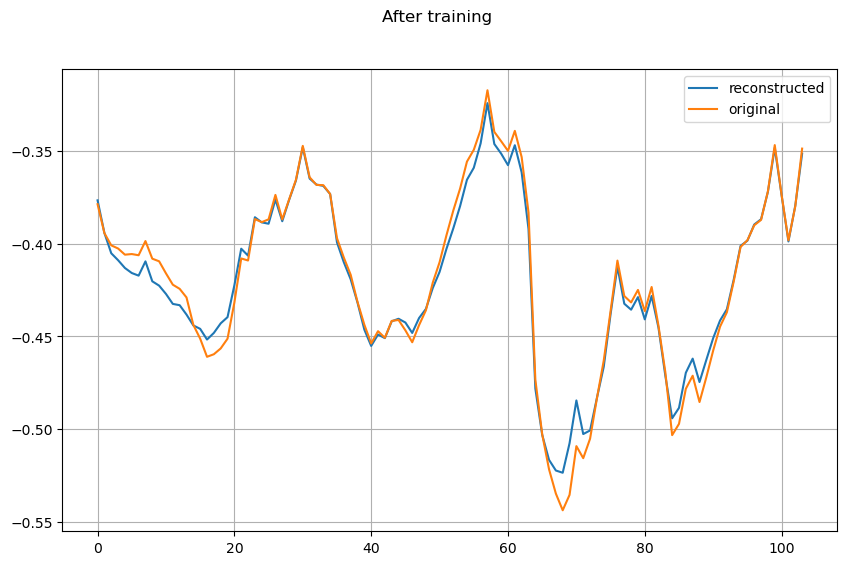

In [48]:
plot_orig_vs_recon('After training')

Now, we plot the 2D data generated by our encoder and try to identify clusters to see what the best method would be here

In [49]:
X_test_scaled.shape

(6178, 104)

In [50]:
encoded_X_test = encoder.predict(X_test_scaled, batch_size=6178)
encoded_X_test.shape

1/1 [==============================] - 0s 53ms/step


(6178, 2)

Text(0, 0.5, 'Latent Dimension 2')

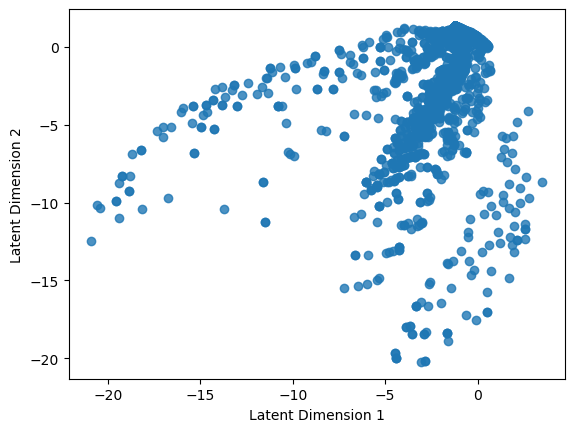

In [51]:
plt.scatter(encoded_X_test[:, 0], encoded_X_test[:, 1], alpha=.8)
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')

So far compared to the PCA graph it looks a little bit better, but we need to see it against each feature to really see if it clustered well.

In [52]:
def plot_encoded_against_single_feature(feature: str):

    arr = y_test[feature].values
    normalized_values = (arr - np.min(arr)) / (np.max(arr) - np.min(arr))

    plt.scatter(encoded_X_test[:, 0], encoded_X_test[:, 1], s = 4, c=[(normalized_values[i], normalized_values[i], 0) for i in range(len(normalized_values))])
    plt.title(f'Autoencoder Graph - {feature}')
    plt.xlabel('Latent Dimension 1')
    plt.ylabel('Latent Dimension 2')

### Observations

Temperature - it's similar to the PCA graph in that the lowest temperature values are all concentrated around one singular point. However, the change in values is much more and more gradual. Clusters don't seem super organized but it is better than PCA.

C/O Ratio - this was the feature that was the best out of 4 in the PCA graphs, and I think this one does it good as well. There seem to be 3 distinct zones where C/O ratio differs. The only issue is the middle value zone is pretty spread out, but it's still an improvement.

Metallicity - along with temperature, this feature was represented poorly in PCA. Here, although values are still fairly intermingled, it's definitely far better than the PCA plot.

Gravity - Almost like an inverted version of the metallicity graph done by the autoencoder, it's similarly better than its PCA counterpart.

***OVERALL***: Autoencoder seems to be the best of the 2 methods

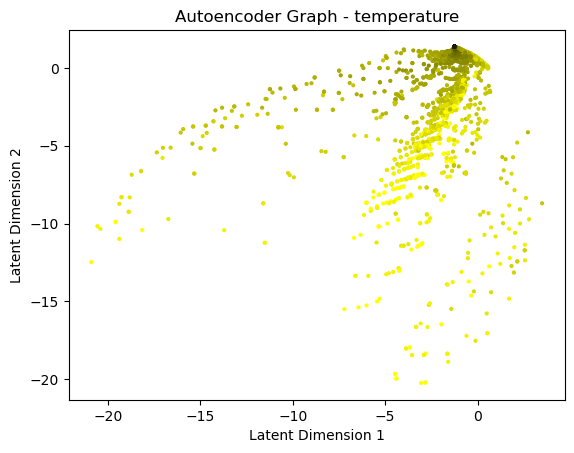

In [53]:
plot_encoded_against_single_feature('temperature')

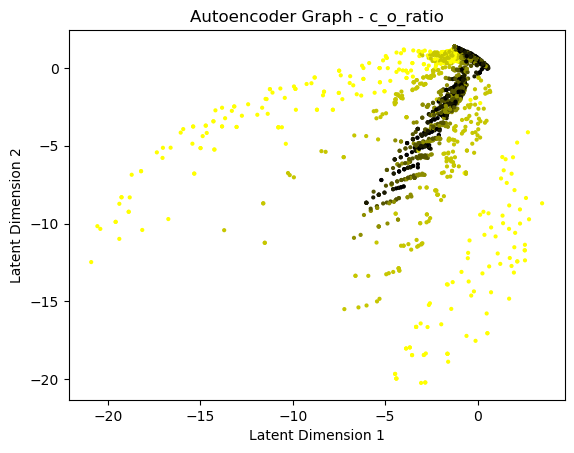

In [54]:
plot_encoded_against_single_feature('c_o_ratio')

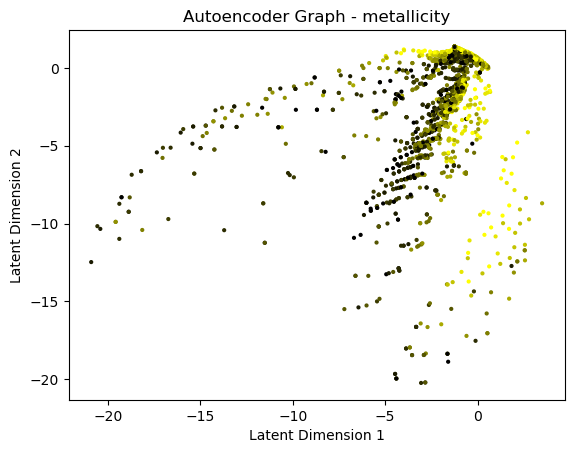

In [55]:
plot_encoded_against_single_feature('metallicity')

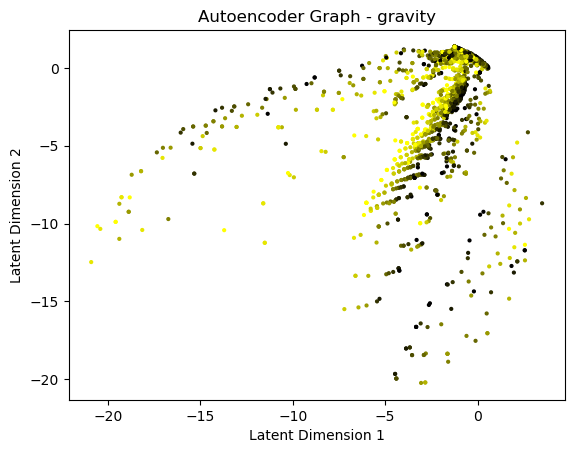

In [56]:
plot_encoded_against_single_feature('gravity')

We save the model weights, architecture, and history to our data path

In [57]:
model_name = 'autoencoder_100epochs_loss3e-3'


path_weights = os.path.join(__reference_data_path__,
                         f'trained_ML_models/trained_weights_{model_name}.h5',
                         )

autoencoder.save_weights(path_weights)

In [58]:
path_architecture = os.path.join(__reference_data_path__,
                         f'trained_ML_models/trained_architecture_{model_name}.h5'
                         )

path_history = os.path.join(__reference_data_path__,
                         f'trained_ML_models/trained_history_{model_name}.pkl',
                         )

autoencoder.save(path_architecture)

with open(path_history, 'wb') as file:
            pk.dump(autoencoder.history, file)

c:\Users\abhin\anaconda3\envs\TelescopeML3-9\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [60]:
temp_ae = Model(inputs=encoder.input, outputs=decoder(encoder.output))
temp_ae.load_weights(os.path.join(
    __reference_data_path__, "trained_ML_models/autoencoder/trained_weights_autoencoder_100epochs_loss3e-3.h5"
))

In [61]:
temp_ae.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_input (InputLayer)    [(None, 104)]             0         
                                                                 
 dense (Dense)               (None, 52)                5460      
                                                                 
 dense_1 (Dense)             (None, 26)                1378      
                                                                 
 dense_2 (Dense)             (None, 10)                270       
                                                                 
 dense_3 (Dense)             (None, 2)                 22        
                                                                 
 sequential_1 (Sequential)   (None, 104)               6664      
                                                                 
Total params: 13794 (53.88 KB)
Trainable params: 13794 (53.

In [59]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_input (InputLayer)    [(None, 104)]             0         
                                                                 
 dense (Dense)               (None, 52)                5460      
                                                                 
 dense_1 (Dense)             (None, 26)                1378      
                                                                 
 dense_2 (Dense)             (None, 10)                270       
                                                                 
 dense_3 (Dense)             (None, 2)                 22        
                                                                 
 sequential_1 (Sequential)   (None, 104)               6664      
                                                                 
Total params: 13794 (53.88 KB)
Trainable params: 13794 (53.88

## Gaussian Mixture Models

To start, I'll make a model to predict C/O ratio as it seems to be the most evenly divided dataset, with 3 fairly clear sections. My only concern is that the clusters would be too far out to be effective, but we will see.